In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', 500)

# For plotting
from itertools import cycle

plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


### Load in the Dataset And Parse Tweet Text

In [4]:
tweets = pd.read_csv('tweets.csv')

In [5]:
def process_tweets(tweets):
    tweets['tweet_datetime'] = pd.to_datetime(tweets['tweet_date'])
    tweets['tweet_date'] = tweets['tweet_datetime'].dt.date
    tweets['wordle_id'] = tweets['tweet_text'].str[:10]
    tweets['n_attempts'] = tweets['tweet_text'].str[11].astype('int')
    tweets['id'] = tweets['tweet_text'].str[7:10].astype('int')
    return tweets
tweets = process_tweets(tweets)

### How many tweets do we have for each day

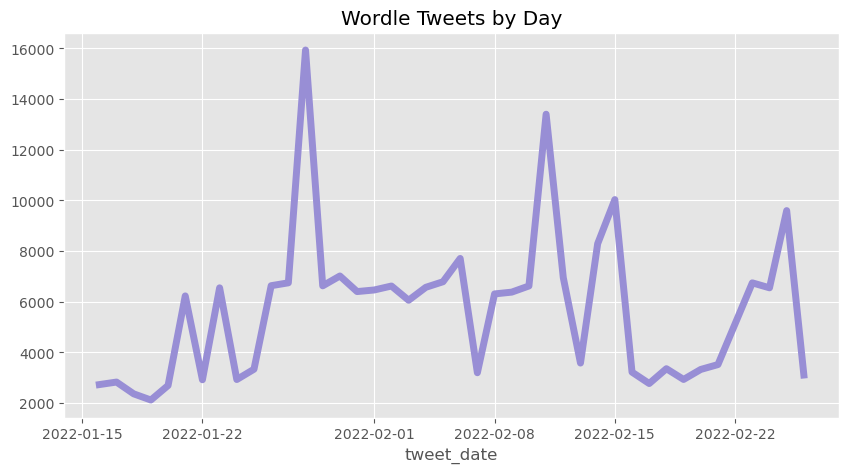

In [6]:
tweets_per_day = tweets['tweet_date'].value_counts().sort_index()
tweets_per_day.plot(figsize=(10, 5),
                    title='Wordle Tweets by Day',
                    color= color_pal[2], lw=5 )
plt.show()

### Number of Attempts Analysis

In [22]:
tweets.groupby(['wordle_id', 'n_attempts']).size() \
    .unstack(fill_value=0).style.background_gradient(axis=1)   

### How many attempts does it usually take to solve?

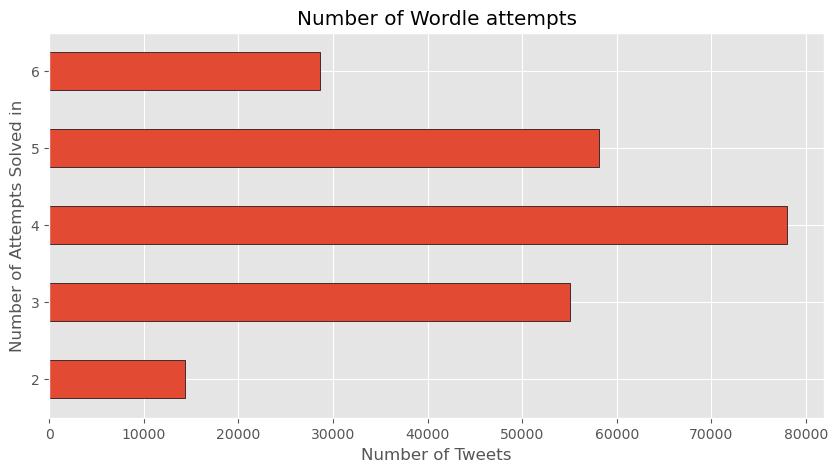

In [30]:
tweets['n_attempts'].value_counts().sort_index()\
                    .plot(figsize=(10, 5), kind='barh', 
                    xlabel='Number of Tweets', ylabel='Number of Attempts Solved in', 
                    title='Number of Wordle attempts', edgecolor='black')
plt.show()

### Parse Tweet Text

In [ ]:
# Make dark squares consistant
tweets['tweet_text'] = tweets['tweet_text'].str.replace('â¬œ','â¬›')

In [39]:
def parse_tweet_text(tweets):
    for n in range(6):
        n += 1 
        tweets[f'has_guess{n}']= tweets['tweet_text'].str.split('\n').str[n+1]\
                            .str.contains('|'.join(['ðŸŸ¨','â¬›','ðŸŸ©'])) \
                            .fillna(False)

        # Parse out the tweet text
        tweets.loc[tweets[f'has_guess{n}'], f'guess{n}'] = \
                tweets['tweet_text'].str.split('\n').str[n + 1].str[:5]

        # Count number correct, misplaced, and incorrect
        tweets.loc[tweets[f'has_guess{n}'],
                    f'guess{n}_incorrect'] = tweets[f'guess{n}'].str.count('â¬›')
        tweets.loc[tweets[f'has_guess{n}'],
                    f'guess{n}_wrong_spot'] = tweets[f'guess{n}'].str.count('ðŸŸ¨')
        tweets.loc[tweets[f'has_guess{n}'],
                    f'guess{n}_correct'] = tweets[f'guess{n}'].str.count('ðŸŸ©')
        tweets.loc[tweets[f'guess{n}_correct'] == 6, 'final_guess'] = n
    return tweets
parse_tweet_text(tweets)

C:\Users\hp\AppData\Local\Temp\ipykernel_13788\3931592385.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)
C:\Users\hp\AppData\Local\Temp\ipykernel_13788\3931592385.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)
C:\Users\hp\AppData\Local\Temp\ipykernel_13788\3931592385.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_dow

wordle_id             tweet_id  tweet_date  tweet_username  \
0       Wordle 210  1482553374591660037  2022-01-16        bpszebes   
1       Wordle 210  1482553387937898499  2022-01-16      cruisecoup   
2       Wordle 210  1482553422276698113  2022-01-16      DestroVega   
3       Wordle 210  1482553436910628866  2022-01-16     brenmardash   
4       Wordle 210  1482553445726908420  2022-01-16     KatieHowse2   
...            ...                  ...         ...             ...   
234181  Wordle 251  1497413074709590024  2022-02-26     SammieLee14   
234182  Wordle 251  1497413096457097218  2022-02-26     real_hotaru   
234183  Wordle 251  1497413098210222084  2022-02-26        mmelmazz   
234184  Wordle 251  1497413110725943298  2022-02-26  Ancient_Wonder   
234185  Wordle 251  1497413114253479938  2022-02-26       acdilbeck   

                                               tweet_text  \
0            Wordle 210 4/6\n\nâ¬›â¬›ðŸŸ¨ðŸŸ¨â¬›\nðŸŸ©â¬›â¬›â¬›â¬›\nðŸŸ©ðŸŸ©ðŸŸ¨â¬›â¬›\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©   
1            Wordle 210 4/6\n\nâ¬œâ¬œâ¬œâ¬œâ¬œ\nðŸŸ©ðŸŸ©ðŸŸ¨ðŸŸ¨â¬œ\nðŸŸ©ðŸŸ©â¬œðŸŸ©ðŸŸ¨\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©   
2            Wordle 210 4/6\n\nâ¬œâ¬œâ¬œðŸŸ¨â¬œ\nâ¬œðŸŸ©â¬œðŸŸ¨â¬œ\nâ¬œðŸŸ©â¬œðŸŸ¨â¬œ\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©   
3                   Wordle 210 3/6\n\nâ¬œâ¬œðŸŸ¨â¬œâ¬œ\nðŸŸ¨ðŸŸ¨â¬œâ¬œâ¬œ\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©   
4                   Wordle 210 3/6\n\nâ¬›â¬›ðŸŸ¨â¬›â¬›\nðŸŸ©ðŸŸ©ðŸŸ©â¬›â¬›\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©   
...                                                   ...   
234181  Wordle 251 6/6\n\nâ¬›â¬›â¬›â¬›â¬›\nâ¬›â¬›â¬›â¬›â¬›\nâ¬›â¬›ðŸŸ¨â¬›â¬›\nâ¬›ðŸŸ©â¬›â¬›â¬›\n...   
234182  Wordle 251 5/6\n\nâ¬›â¬›â¬›â¬›â¬›\nâ¬›â¬›â¬›â¬›â¬›\nðŸŸ¨â¬›ðŸŸ¨â¬›â¬›\nâ¬›â¬›ðŸŸ¨â¬›â¬›\n...   
234183  Wordle 251 5/6\n\nâ¬›â¬›â¬›â¬›â¬›\nâ¬›ðŸŸ©â¬›â¬›â¬›\nðŸŸ¨ðŸŸ©â¬›â¬›â¬›\nâ¬›ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©\n...   
234184              Wordle 251 3/6\n\nâ¬œâ¬œðŸŸ©â¬œâ¬œ\nðŸŸ©ðŸŸ©â¬œðŸŸ©â¬œ\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©   
234185  Wordle 251 5/6\n\nâ¬›â¬›â¬›â¬›ðŸŸ©\nâ¬›ðŸŸ©â¬›â¬›ðŸŸ©\nâ¬›ðŸŸ©â¬›ðŸŸ©ðŸŸ©\nâ¬›ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©\n...   

                  tweet_datetime  n_attempts   id  has_guess1 guess1  \
0      2022-01-16 03:20:43+00:00           4  210        True  â¬›â¬›ðŸŸ¨ðŸŸ¨â¬›   
1      2022-01-16 03:20:46+00:00           4  210       False    NaN   
2      2022-01-16 03:20:55+00:00           4  210        True  â¬œâ¬œâ¬œðŸŸ¨â¬œ   
3      2022-01-16 03:20:58+00:00           3  210        True  â¬œâ¬œðŸŸ¨â¬œâ¬œ   
4      2022-01-16 03:21:00+00:00           3  210        True  â¬›â¬›ðŸŸ¨â¬›â¬›   
...                          ...         ...  ...         ...    ...   
234181 2022-02-26 03:27:52+00:00           6  251        True  â¬›â¬›â¬›â¬›â¬›   
234182 2022-02-26 03:27:57+00:00           5  251        True  â¬›â¬›â¬›â¬›â¬›   
234183 2022-02-26 03:27:57+00:00           5  251        True  â¬›â¬›â¬›â¬›â¬›   
234184 2022-02-26 03:28:00+00:00           3  251        True  â¬œâ¬œðŸŸ©â¬œâ¬œ   
234185 2022-02-26 03:28:01+00:00           5  251        True  â¬›â¬›â¬›â¬›ðŸŸ©   

        guess1_incorrect  guess1_wrong_spot  guess1_correct  final_guess  \
0                    3.0                2.0             0.0          NaN   
1                    NaN                NaN             NaN          NaN   
2                    0.0                1.0             0.0          NaN   
3                    0.0                1.0             0.0          NaN   
4                    4.0                1.0             0.0          NaN   
...                  ...                ...             ...          ...   
234181               5.0                0.0             0.0          NaN   
234182               5.0                0.0             0.0          NaN   
234183               5.0                0.0             0.0          NaN   
234184               0.0                0.0             1.0          NaN   
234185               4.0                0.0             1.0          NaN   

        has_guess2 guess2  guess2_incorrect  guess2_wrong_spot  \
0             True  ðŸŸ©â¬›â¬›

In [31]:
print(tweets['tweet_text'].values[0])

Wordle 210 4/6

â¬›â¬›ðŸŸ¨ðŸŸ¨â¬›
ðŸŸ©â¬›â¬›â¬›â¬›
ðŸŸ©ðŸŸ©ðŸŸ¨â¬›â¬›
ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©
